In [21]:
import pandas as pd

### By City

In [22]:
df = pd.read_csv('housing.csv')

In [23]:
df = df[~df.area_name.isin([
    'x'
])]

In [24]:
df = df.query('area_level != "country"')[['area_name', 'variable', 'year', 'value']]

In [25]:
df = df.pivot_table(index=['area_name', 'year'], columns='variable', values='value').reset_index()

In [26]:
df = df.dropna()

In [28]:
df['pc'] = df['dwellings']/df['population']

In [20]:
df[['area_name', 'year', 'pc']].pivot_table(index='area_name', columns='year', values='pc').to_excel('cities_pc_growth.xlsx')

In [16]:
df.to_excel('cities.xlsx', index=False)

In [5]:
df.pivot_table(index=['area_name','year'], columns='variable', values='value')

/var/folders/by/095_7x8j04x77vcq4_rvm1_m0000gn/T/ipykernel_2356/1808300527.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df.pivot_table(index=['area_name','year'], columns='variable', values='value')


Empty DataFrame
Columns: []
Index: [(Amsterdam, 2002), (Amsterdam, 2003), (Amsterdam, 2004), (Amsterdam, 2005), (Amsterdam, 2006), (Amsterdam, 2007), (Amsterdam, 2008), (Amsterdam, 2009), (Amsterdam, 2010), (Amsterdam, 2011), (Amsterdam, 2012), (Amsterdam, 2013), (Amsterdam, 2014), (Amsterdam, 2015), (Amsterdam, 2016), (Amsterdam, 2017), (Amsterdam, 2018), (Amsterdam, 2019), (Amsterdam, 2020), (Amsterdam, 2021), (Australia, 1991), (Australia, 1992), (Australia, 1993), (Australia, 1994), (Australia, 1995), (Australia, 1996), (Australia, 1997), (Australia, 1998), (Australia, 1999), (Australia, 2000), (Australia, 2001), (Australia, 2002), (Australia, 2003), (Australia, 2004), (Australia, 2005), (Australia, 2006), (Australia, 2007), (Australia, 2008), (Australia, 2009), (Australia, 2010), (Australia, 2011), (Australia, 2012), (Australia, 2013), (Australia, 2014), (Australia, 2015), (Australia, 2016), (Australia, 2017), (Australia, 2018), (Australia, 2019), (Australia, 2020), (Australia, 2021), (Austria, 1971), (Austria, 1981), (Austria, 1982), (Austria, 1983), (Austria, 1984), (Austria, 1985), (Austria, 1986), (Austria, 1987), (Austria, 1988), (Austria, 1989), (Austria, 1990), (Austria, 1991), (Austria, 1992), (Austria, 1993), (Austria, 1994), (Austria, 1995), (Austria, 1996), (Austria, 1997), (Austria, 1998), (Austria, 1999), (Austria, 2000), (Austria, 2001), (Austria, 2002), (Austria, 2003), (Austria, 2004), (Austria, 2005), (Austria, 2006), (Austria, 2007), (Austria, 2008), (Austria, 2009), (Austria, 2010), (Austria, 2011), (Austria, 2012), (Austria, 2013), (Austria, 2014), (Austria, 2015), (Austria, 2016), (Austria, 2017), (Austria, 2018), (Austria, 2019), (Austria, 2020), (Austria, 2021), (Barcelona, 1991), (Barcelona, 1998), (Barcelona, 1999), (Barcelona, 2000), (Barcelona, 2001), (Barcelona, 2002), (Barcelona, 2003), ...]

[1169 rows x 0 columns]

In [6]:
df = df.pivot_table(index=['area_name','year'], columns='variable', values='value')

/var/folders/by/095_7x8j04x77vcq4_rvm1_m0000gn/T/ipykernel_2356/2795389716.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df = df.pivot_table(index=['area_name','year'], columns='variable', values='value')


In [7]:
# Flatten the multi-index
df = df.reset_index()
df = df[['area_name', 'year', 'dwellings', 'population']]

KeyError: "['dwellings', 'population'] not in index"

In [ ]:
df = df.dropna()

In [ ]:
df['dwellings_per_capita'] = df['dwellings'] / df['population']

In [ ]:
df.to_csv('housing_eur_cities.csv', index=False)

### By Country

In [153]:
df = pd.read_csv('housing.csv')
df = df.query('area_level == "country" & variable == "dwellings"  & area_name != "England"')
df = df[['area_name', 'year', 'value']]
df.columns = ['area_name', 'year', 'dwellings']
# match arean_name to ISO3
iso3_df = pd.read_csv('http://raw.githubusercontent.com/datasets/country-codes/master/data/country-codes.csv')
iso3_df = iso3_df[['ISO3166-1-Alpha-3', 'CLDR display name']]
iso3_df.columns = ['iso3', 'area_name']
df = df.merge(iso3_df, on='area_name')
df.year = df.year.astype(int)

In [154]:
pop_df = pd.read_csv('housing.csv')
pop_df = pop_df.query('area_level == "country" & variable == "population"  & area_name != "England"')
pop_df = pop_df[['area_name', 'year', 'value']]
pop_df.columns = ['area_name', 'year', 'population']
# match arean_name to ISO3
iso3_pop_df = pd.read_csv('http://raw.githubusercontent.com/datasets/country-codes/master/data/country-codes.csv')
iso3_pop_df = iso3_pop_df[['ISO3166-1-Alpha-3', 'CLDR display name']]
iso3_pop_df.columns = ['iso3', 'area_name']
pop_df = pop_df.merge(iso3_pop_df, on='area_name')
pop_df.year = pop_df.year.astype(int)

In [155]:
df = pd.merge(df, pop_df, on=['iso3', 'area_name', 'year'])


In [156]:
# 
df = df[~df.dwellings.str.contains('`')]
df.dwellings = df.dwellings.astype(int, errors='ignore')
df.population = df.population.astype(int, errors='ignore')
df.dwellings = df.dwellings/df.population
df.dropna(inplace=True)

In [159]:
# Drop population column
df = df[['iso3', 'area_name', 'year', 'dwellings']]

In [160]:
c_df = pd.read_csv('house_prices.csv')
c_df = c_df.query('SUBJECT == "REAL"')
c_df = c_df[['LOCATION', 'TIME', 'Value']]
c_df.columns = ['iso3', 'year', 'house_price_index']
c_df = c_df[~c_df.year.str.contains('Q', na=False)]
c_df.year = c_df.year.astype(int)

In [161]:
df = df.merge(c_df, on=['iso3', 'year'])
df.dropna(inplace=True)

In [162]:
indexes = []
for iso3 in df.iso3.unique():
    for year in range(2023, 2017, -1):
        filtered_df = df.query(f'iso3 == "{iso3}" & (year == {year} | year == {year-20})')
        if len(filtered_df) == 2:
            indexes.append(filtered_df.index)
            break
indexes = [item for sublist in indexes for item in sublist]

In [163]:
df = df.loc[indexes]

In [164]:
# Calculate the change in house prices
df = df.sort_values(['iso3', 'year'])
df = df.astype({'house_price_index': 'float64', 'dwellings': 'float64'})
df['house_price_index_change'] = df.groupby('iso3')['house_price_index'].pct_change()
df['dwellings_change'] = df.groupby('iso3')['dwellings'].pct_change()
df = df.dropna()
df['period'] = df['year'].apply(lambda x: f'{str(x-20)}-{str(x)}')

In [165]:
flags_df  = pd.read_csv('https://raw.githubusercontent.com/tamirandtom/Countries-flag-emoji-csv/master/countries.csv')
flags_df.iloc[0] = flags_df.columns
flags_df.columns = ['flag', 'iso3']
flags_df['flag_iso3'] = flags_df['flag']+flags_df['iso3']

In [166]:
df = df[['iso3', 'area_name', 'period', 'house_price_index_change', 'dwellings_change']]
df = df.merge(flags_df, on='iso3')


In [169]:
df

,iso3,area_name,period,house_price_index_change,dwellings_change,flag,flag_iso3
0,AUS,Australia,2001-2021,1.395822,0.026255,🇦🇺,🇦🇺AUS
1,AUT,Austria,2001-2021,0.793785,0.148298,🇦🇹,🇦🇹AUT
2,BEL,Belgium,2001-2021,0.706122,0.064815,🇧🇪,🇧🇪BEL
3,CAN,Canada,2001-2021,1.865801,0.069888,🇨🇦,🇨🇦CAN
4,CHE,Switzerland,2000-2020,0.758732,0.066256,🇨🇭,🇨🇭CHE
5,DEU,Germany,2001-2021,0.409845,0.103145,🇩🇪,🇩🇪DEU
6,ESP,Spain,2001-2021,0.478991,0.071614,🇪🇸,🇪🇸ESP
7,FIN,Finland,2001-2021,0.416851,0.162168,🇫🇮,🇫🇮FIN
8,FRA,France,2002-2022,0.750698,0.121960,🇫🇷,🇫🇷FRA
9,GBR,UK,2000-2020,0.896762,0.024460,🇬🇧,🇬🇧GBR


In [125]:
df.to_csv('dwellings_houseprices.csv', index=False)

In [107]:
df.melt(id_vars=['iso3', 'year'], value_vars=['dwellings', 'house_price_index'])

,iso3,year,variable,value
0,FRA,1975,dwellings,21078323
1,FRA,1982,dwellings,23652000
2,FRA,1983,dwellings,24003000
3,FRA,1984,dwellings,24368000
4,FRA,1985,dwellings,24713000
...,...,...,...,...
953,GBR,2020,house_price_index,111.484581
954,SVN,2011,house_price_index,123.794318
955,SVN,2015,house_price_index,100.0
956,SVN,2018,house_price_index,117.807888


In [104]:
df.pivot_table(index=['iso3', 'year'], columns='variable', values=['dwellings', 'house_price_index'])

KeyError: 'variable'

In [95]:
indexes[0].values

array([31, 41])

In [92]:
len(indexes)

20

In [77]:
df.query('iso3 == "GBR" & (year == 2020 | year == 2000)').index

Int64Index([454, 474], dtype='int64')

In [74]:
df

,area_name,year,dwellings,iso3,house_price_index
0,France,1975,21078323,FRA,45.427497
1,France,1982,23652000,FRA,51.626604
2,France,1983,24003000,FRA,48.666846
3,France,1984,24368000,FRA,45.942604
4,France,1985,24713000,FRA,45.958374
...,...,...,...,...,...
474,UK,2020,29548000,GBR,111.484581
475,Slovenia,2011,844656,SVN,123.794318
476,Slovenia,2015,845415,SVN,100.000000
477,Slovenia,2018,852181,SVN,117.807888


In [42]:
c_df.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'COL', 'EST', 'IND',
       'IDN', 'ISR', 'LVA', 'LTU', 'RUS', 'SVN', 'ZAF', 'EA', 'EA17',
       'OECD', 'BGR', 'ROU', 'SAU', 'HRV'], dtype=object)

In [18]:
df = pd.read_csv('housing.csv')

In [19]:

df = df.query('area_level == "country" & variable == "dwellings" & (year == 2020 | year == 2000) & area_name != "England"').sort_values('area_name', ascending=False)

In [20]:
df = df[['area_name', 'year', 'value']]

In [21]:
df = df.pivot_table(index='area_name', columns='year', values='value')
df['dwellings_growth'] = df[2020] / df[2000] - 1

In [22]:
df['ISO3'] = df.index.map({
    'South Korea': 'KOR',
    'Switzerland': 'CHE',
    'New Zealand': 'NZL',
    'Taiwan': 'TWN',
    'Austria': 'AUT',
    'Poland': 'POL',
    'Finland': 'FIN',
    'France': 'FRA',
    'Netherlands': 'NLD',
    'Sweden': 'SWE',
    'UK': 'GBR',
    'Germany': 'DEU'})
# and ISO3_flag_emoji
df['Flag'] = df.index.map({
    'South Korea': '🇰🇷',
    'Switzerland': '🇨🇭',
    'New Zealand': '🇳🇿',
    'Taiwan': '🇹🇼',
    'Austria': '🇦🇹',
    'Poland': '🇵🇱',
    'Finland': '🇫🇮',
    'France': '🇫🇷',
    'Netherlands': '🇳🇱',
    'Sweden': '🇸🇪',
    'UK': '🇬🇧',
    'Germany': '🇩🇪'})

In [23]:
df.dropna(inplace=True)

In [24]:
df.dropna().sort_values('dwellings_growth', ascending=False)

year,2000,2020,dwellings_growth,ISO3,Flag
area_name,,,,,
South Korea,11472400.0,21673500.0,0.889186,KOR,🇰🇷
Switzerland,3569181.0,4637174.0,0.299226,CHE,🇨🇭
New Zealand,1486600.0,1919800.0,0.291403,NZL,🇳🇿
Taiwan,6993099.0,8992364.0,0.285891,TWN,🇹🇼
Austria,3816300.0,4875111.0,0.277444,AUT,🇦🇹
Poland,11844840.0,15015333.0,0.267669,POL,🇵🇱
Finland,2512442.0,3124286.0,0.243526,FIN,🇫🇮
France,28988000.0,35986000.0,0.241410,FRA,🇫🇷
Netherlands,6669000.0,7891786.0,0.183354,NLD,🇳🇱


In [25]:
c_df = pd.read_csv('house_prices.csv')

In [26]:
c_df = c_df.query('SUBJECT == "REAL"')

In [27]:
c_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
153,AUS,HOUSECOST,REAL,IDX2015,A,1970,26.180654,NaN
154,AUS,HOUSECOST,REAL,IDX2015,A,1971,27.289072,NaN
155,AUS,HOUSECOST,REAL,IDX2015,A,1972,28.669226,NaN
156,AUS,HOUSECOST,REAL,IDX2015,A,1973,31.772025,NaN
157,AUS,HOUSECOST,REAL,IDX2015,A,1974,33.731021,NaN
...,...,...,...,...,...,...,...,...
41448,HRV,HOUSECOST,REAL,IDX2015,Q,2021-Q4,135.656785,NaN
41449,HRV,HOUSECOST,REAL,IDX2015,Q,2022-Q1,139.009665,NaN
41450,HRV,HOUSECOST,REAL,IDX2015,Q,2022-Q2,134.762837,NaN
41451,HRV,HOUSECOST,REAL,IDX2015,Q,2022-Q3,137.335058,NaN


In [28]:
c_df = c_df[['LOCATION', 'TIME', 'Value']]

In [29]:
c_df = c_df.pivot_table(index=['LOCATION'], columns='TIME', values='Value')

In [30]:
c_df['house_price_growth'] = (c_df['2021'] / c_df['2001'])-1

In [31]:
p_g_df = c_df[['house_price_growth']].reset_index()

In [32]:
# join p_g_df and df on ISO3
df = p_g_df.merge(df, left_on='LOCATION', right_on='ISO3')

In [33]:
df['ISO3_Flag'] = df['Flag']+df['ISO3']

In [34]:
df.dropna().sort_values('house_price_growth', ascending=False).to_csv('housing_growth.csv', index=False)

In [35]:
df

,LOCATION,house_price_growth,2000,2020,dwellings_growth,ISO3,Flag,ISO3_Flag
0,AUT,0.793785,3816300.0,4875111.0,0.277444,AUT,🇦🇹,🇦🇹AUT
1,CHE,0.866524,3569181.0,4637174.0,0.299226,CHE,🇨🇭,🇨🇭CHE
2,DEU,0.409845,38383645.0,42803737.0,0.115156,DEU,🇩🇪,🇩🇪DEU
3,FIN,0.416851,2512442.0,3124286.0,0.243526,FIN,🇫🇮,🇫🇮FIN
4,FRA,0.860642,28988000.0,35986000.0,0.241410,FRA,🇫🇷,🇫🇷FRA
5,GBR,0.877468,25319000.0,29548000.0,0.167029,GBR,🇬🇧,🇬🇧GBR
6,KOR,0.435808,11472400.0,21673500.0,0.889186,KOR,🇰🇷,🇰🇷KOR
7,NLD,0.320089,6669000.0,7891786.0,0.183354,NLD,🇳🇱,🇳🇱NLD
8,NZL,2.697916,1486600.0,1919800.0,0.291403,NZL,🇳🇿,🇳🇿NZL
9,POL,NaN,11844840.0,15015333.0,0.267669,POL,🇵🇱,🇵🇱POL


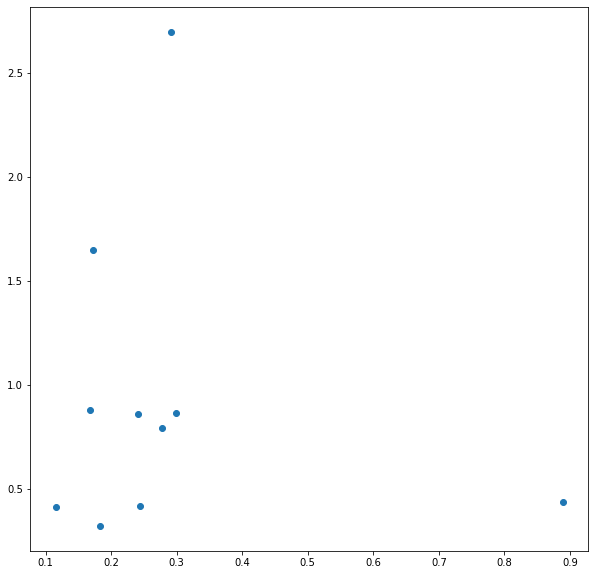

In [36]:
df
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['dwellings_growth'], df['house_price_growth'])

In [164]:
c_df.TIME.unique()

AttributeError: 'DataFrame' object has no attribute 'TIME'

In [163]:
c_df['2022-Q1'].value_counts()

144.579327    1
163.948323    1
97.667923     1
117.157320    1
109.236411    1
143.081556    1
162.716845    1
144.387363    1
118.503514    1
158.809881    1
120.643252    1
166.369834    1
133.823798    1
130.646931    1
165.564761    1
106.026327    1
142.063539    1
75.550863     1
140.110883    1
145.352232    1
125.173440    1
123.513572    1
149.901847    1
131.395447    1
138.598944    1
113.240542    1
99.636131     1
126.302618    1
71.205453     1
156.711222    1
126.847065    1
134.797741    1
133.839313    1
110.958828    1
166.937276    1
145.048398    1
128.810321    1
127.722867    1
127.634347    1
124.266155    1
136.631611    1
103.610355    1
119.880047    1
122.042731    1
121.148864    1
139.009665    1
177.013887    1
97.354432     1
96.985249     1
Name: 2022-Q1, dtype: int64

In [143]:
df.query('year == 2021 | year == 1990')

,year,ref_date,variable,value,area_name,full_area_name,area_level,country_name,grouping,record_created,record_updated,source_org,source_title,source_pub_date,frequency,source_link,notes
10,1990,01/01/1990,dwellings,26197000,France,France métropolitaine,country,France,Southern Europe,23/12/2020,23/12/2020,Insee,Estimation annuelle du parc de logements - Nom...,19/08/2020,Annual,https://www.insee.fr/fr/statistiques/serie/001...,NaN
41,2021,01/01/2021,dwellings,36273000,France,France métropolitaine,country,France,Southern Europe,19/12/2021,21/10/2022,Insee,Estimation annuelle du parc de logements - Nom...,30/09/2021,Annual,https://www.insee.fr/fr/statistiques/serie/001...,NaN
83,1990,31/12/1990,dwellings,33856321,Germany,Germany,country,Germany,Central/North Europe,23/12/2020,23/12/2020,Destatis,Fortschreibung des Wohngebäude- und Wohnungsbe...,29/07/2020,Annual,https://www.destatis.de/DE/Themen/Gesellschaft...,NaN
114,2021,31/12/2021,dwellings,43084056,Germany,Germany,country,Germany,Central/North Europe,31/07/2022,31/07/2022,Destatis,Fortschreibung des Wohngebäude- und Wohnungsbe...,28/07/2022,Annual,https://www.destatis.de/DE/Themen/Gesellschaft...,NaN
182,2021,31/12/2021,dwellings,25976305,Spain,Spain,country,Spain,Southern Europe,10/07/2022,10/07/2022,"Ministerio de Transportes, Movilidad y Agenda ...",Estimación del Parque de Viviendas - Total de ...,08/06/2022,Annual,https://www.mitma.gob.es/el-ministerio/informa...,NaN
193,1990,01/01/1990,population,56577000,France,France métropolitaine,country,France,Southern Europe,23/12/2020,23/12/2020,Insee,Population totale au 1er janvier - France métr...,14/01/2020,Annual,https://www.insee.fr/fr/statistiques/serie/000...,NaN
224,2021,01/01/2021,population,65447454,France,France métropolitaine,country,France,Southern Europe,19/12/2021,21/10/2022,Insee,Population totale au 1er janvier - France métr...,29/03/2021,Annual,https://www.insee.fr/fr/statistiques/serie/000...,NaN
262,1990,31/12/1990,population,79753227,Germany,Germany,country,Germany,Central/North Europe,23/12/2020,23/12/2020,Destatis (Statistisches Bundesamt),"Bevölkerung: Deutschland, Stichtag (Table 1241...",30/06/2021,Annual,https://www-genesis.destatis.de/genesis//onlin...,NaN
293,2021,31/12/2021,population,83237124,Germany,Germany,country,Germany,Central/North Europe,28/12/2022,28/12/2022,Destatis (Statistisches Bundesamt),"Bevölkerung: Bundesländer, Stichtag (Table 124...",21/06/2022,Annual,https://www-genesis.destatis.de/genesis/downlo...,NaN
370,2021,01/01/2021,population,47385107,Spain,Spain,country,Spain,Southern Europe,28/12/2022,28/12/2022,Instituto Nacional de Estadística,Cifras oficiales de población resultantes de l...,NaN,Annual,https://www.ine.es/dynt3/inebase/es/index.htm?...,NaN


In [140]:
df.year.describe()

count    1341.000000
mean     2001.586130
std        14.417374
min      1960.000000
25%      1992.000000
50%      2004.000000
75%      2013.000000
max      2022.000000
Name: year, dtype: float64

In [20]:
df.variable.value_counts()

population    375
dwellings     307
Name: variable, dtype: int64